# Regression in Python

***
This is a very quick run-through of some basic statistical concepts, adapted from [Lab 4 in Harvard's CS109](https://github.com/cs109/2015lab4) course. Please feel free to try the original lab if you're feeling ambitious :-) The CS109 git repository also has the solutions if you're stuck.

* Linear Regression Models
* Prediction using linear regression

Linear regression is used to model and predict continuous outcomes with normal random errors. There are nearly an infinite number of different types of regression models and each regression model is typically defined by the distribution of the prediction errors (called "residuals") of the type of data. Logistic regression is used to model binary outcomes whereas Poisson regression is used to predict counts. In this exercise, we'll see some examples of linear regression as well as Train-test splits.

The packages we'll cover are: `statsmodels`, `seaborn`, and `scikit-learn`. While we don't explicitly teach `statsmodels` and `seaborn` in the Springboard workshop, those are great libraries to know.
***

<img width=600 height=300 src="https://imgs.xkcd.com/comics/sustainable.png"/>
***

In [1]:
# special IPython command to prepare the notebook for matplotlib and other libraries
%matplotlib inline 

import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import sklearn

import seaborn as sns

# special matplotlib argument for improved plots
from matplotlib import rcParams
sns.set_style("whitegrid")
sns.set_context("poster")


***
# Part 1: Introduction to Linear Regression
### Purpose of linear regression
***
<div class="span5 alert alert-info">

<p> Given a dataset containing predictor variables $X$ and outcome/response variable $Y$, linear regression can be used to: </p>
<ul>
  <li> Build a <b>predictive model</b> to predict future values of $\hat{Y}$, using new data $X^*$ where $Y$ is unknown.</li>
  <li> Model the <b>strength of the relationship</b> between each independent variable $X_i$ and $Y$</li>
    <ul>
      <li> Many times, only a subset of independent variables $X_i$ will have a linear relationship with $Y$</li>
      <li> Need to figure out which $X_i$ contributes most information to predict $Y$ </li>
    </ul>
   <li>It is in many cases, the first pass prediction algorithm for continuous outcomes. </li>
</ul>
</div>

### A Brief Mathematical Recap
***

[Linear Regression](http://en.wikipedia.org/wiki/Linear_regression) is a method to model the relationship between a set of independent variables $X$ (also knowns as explanatory variables, features, predictors) and a dependent variable $Y$.  This method assumes the relationship between each predictor $X$ is **linearly** related to the dependent variable $Y$. The most basic linear regression model contains one independent variable $X$, we'll call this the simple model. 

$$ Y = \beta_0 + \beta_1 X + \epsilon$$

where $\epsilon$ is considered as an unobservable random variable that adds noise to the linear relationship. In linear regression, $\epsilon$ is assumed to be normally distributed with a mean of 0. In other words, what this means is that on average, if we know $Y$, a roughly equal number of predictions $\hat{Y}$ will be above $Y$ and others will be below $Y$. That is, on average, the error is zero. The residuals, $\epsilon$ are also assumed to be "i.i.d.": independently and identically distributed. Independence means that the residuals are not correlated -- the residual from one prediction has no effect on the residual from another prediction. Correlated errors are common in time series analysis and spatial analyses.

* $\beta_0$ is the intercept of the linear model and represents the average of $Y$ when all independent variables $X$ are set to 0.

* $\beta_1$ is the slope of the line associated with the regression model and represents the average effect of a one-unit increase in $X$ on $Y$.

* Back to the simple model. The model in linear regression is the *conditional mean* of $Y$ given the values in $X$ is expressed a linear function.  

$$ y = f(x) = E(Y | X = x)$$ 

![conditional mean](images/conditionalmean.png)
*Image from http://www.learner.org/courses/againstallodds/about/glossary.html. Note this image uses $\alpha$ and $\beta$ instead of $\beta_0$ and $\beta_1$.*

* The goal is to estimate the coefficients (e.g. $\beta_0$ and $\beta_1$). We represent the estimates of the coefficients with a "hat" on top of the letter.  

$$ \hat{\beta}_0, \hat{\beta}_1 $$

* Once we estimate the coefficients $\hat{\beta}_0$ and $\hat{\beta}_1$, we can use these to predict new values of $Y$ given new data $X$.

$$\hat{y} = \hat{\beta}_0 + \hat{\beta}_1 x_1$$

* Multiple linear regression is when you have more than one independent variable and the estimation involves matrices
    * $X_1$, $X_2$, $X_3$, $\ldots$


* How do you estimate the coefficients? 
    * There are many ways to fit a linear regression model
    * The method called **least squares** is the most common methods
    * We will discuss least squares

$$ Y = \beta_0 + \beta_1 X_1 + \ldots + \beta_p X_p + \epsilon$$ 
    
### Estimating $\hat\beta$: Least squares
***
[Least squares](http://en.wikipedia.org/wiki/Least_squares) is a method that can estimate the coefficients of a linear model by minimizing the squared residuals: 

$$ \mathscr{L} = \sum_{i=1}^N \epsilon_i^2 = \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2  = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

where $N$ is the number of observations and $\epsilon$ represents a residual or error, ACTUAL - PREDICTED.  

#### Estimating the intercept $\hat{\beta_0}$ for the simple linear model

We want to minimize the squared residuals and solve for $\hat{\beta_0}$ so we take the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta_0}$ 

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_0}} &= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_0}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= -2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \hspace{25mm} \mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N (y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i) \\
&= -2 \left[ \left( \sum_{i=1}^N y_i \right) - N \hat{\beta_0} - \hat{\beta}_1 \left( \sum_{i=1}^N x_i
\right) \right] \\
& 2 \left[ N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i \right] = 0 \hspace{20mm} \mbox{(Set equal to 0 and solve for $\hat{\beta}_0$)} \\
& N \hat{\beta}_0 + \hat{\beta}_1 \sum_{i=1}^N x_i - \sum_{i=1}^N y_i = 0 \\
& N \hat{\beta}_0 = \sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i - \hat{\beta}_1 \sum_{i=1}^N x_i}{N} \\
& \hat{\beta}_0 = \frac{\sum_{i=1}^N y_i}{N} - \hat{\beta}_1 \frac{\sum_{i=1}^N x_i}{N} \\
& \boxed{\hat{\beta}_0 = \bar{y} - \hat{\beta}_1 \bar{x}}
\end{align}
$

Using this new information, we can compute the estimate for $\hat{\beta}_1$ by taking the partial derivative of $\mathscr{L}$ with respect to $\hat{\beta}_1$.

$
\begin{align}
\frac{\partial \mathscr{L}}{\partial \hat{\beta_1}} &= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \epsilon^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \hat{y}_i \right)^2 \\
&= \frac{\partial}{\partial \hat{\beta_1}} \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right)^2 \\
&= 2 \sum_{i=1}^N \left( y_i - \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) \right) \left( -x_i \right) \hspace{25mm}\mbox{(by chain rule)} \\
&= -2 \sum_{i=1}^N x_i \left( y_i - \hat{\beta}_0 - \hat{\beta}_1 x_i \right) \\
&= -2 \sum_{i=1}^N x_i (y_i - \hat{\beta}_0 x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N x_i (y_i - \left( \bar{y} - \hat{\beta}_1 \bar{x} \right) x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \sum_{i=1}^N (x_i y_i - \bar{y}x_i + \hat{\beta}_1\bar{x}x_i - \hat{\beta}_1 x_i^2) \\
&= -2 \left[ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i + \hat{\beta}_1\bar{x}\sum_{i=1}^N x_i - \hat{\beta}_1 \sum_{i=1}^N x_i^2 \right] \\
&= -2 \left[ \hat{\beta}_1 \left\{ \bar{x} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i^2 \right\} + \left\{ \sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i \right\}\right] \\
& 2 \left[ \hat{\beta}_1 \left\{ \sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i \right\} + \left\{ \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right\} \right] = 0 \\
& \hat{\beta}_1 = \frac{-\left( \bar{y} \sum_{i=1}^N x_i - \sum_{i=1}^N x_i y_i \right)}{\sum_{i=1}^N x_i^2 - \bar{x}\sum_{i=1}^N x_i} \\
&= \frac{\sum_{i=1}^N x_i y_i - \bar{y} \sum_{i=1}^N x_i}{\sum_{i=1}^N x_i^2 - \bar{x} \sum_{i=1}^N x_i} \\
& \boxed{\hat{\beta}_1 = \frac{\sum_{i=1}^N x_i y_i - \bar{x}\bar{y}n}{\sum_{i=1}^N x_i^2 - n \bar{x}^2}}
\end{align}
$

The solution can be written in compact matrix notation as

$$\hat\beta =  (X^T X)^{-1}X^T Y$$ 

We wanted to show you this in case you remember linear algebra, in order for this solution to exist we need $X^T X$ to be invertible. Of course this requires a few extra assumptions, $X$ must be full rank so that $X^T X$ is invertible, etc. Basically, $X^T X$ is full rank if all rows and columns are linearly independent. This has a loose relationship to variables and observations being independent respective. **This is important for us because this means that having redundant features in our regression models will lead to poorly fitting (and unstable) models.** We'll see an implementation of this in the extra linear regression example.

***
# Part 2: Exploratory Data Analysis for Linear Relationships

The [Boston Housing data set](https://archive.ics.uci.edu/ml/datasets/Housing) contains information about the housing values in suburbs of Boston.  This dataset was originally taken from the StatLib library which is maintained at Carnegie Mellon University and is now available on the UCI Machine Learning Repository. 


## Load the Boston Housing data set from `sklearn`
***

This data set is available in the [sklearn](http://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_boston.html#sklearn.datasets.load_boston) python module which is how we will access it today.  

In [2]:
from sklearn.datasets import load_boston
import pandas as pd

boston = load_boston()

In [3]:
boston.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'filename'])

In [4]:
boston.data.shape

(506, 13)

In [5]:
# Print column names
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [6]:
# Print description of Boston housing data set
print(boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

Now let's explore the data set itself. 

In [7]:
bos = pd.DataFrame(boston.data)
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


There are no column names in the DataFrame. Let's add those. 

In [8]:
bos.columns = boston.feature_names
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


Now we have a pandas DataFrame called `bos` containing all the data we want to use to predict Boston Housing prices.  Let's create a variable called `PRICE` which will contain the prices. This information is contained in the `target` data. 

In [9]:
print(boston.target.shape)

(506,)


In [10]:
bos['PRICE'] = boston.target
bos.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33,36.2


## EDA and Summary Statistics
***

Let's explore this data set.  First we use `describe()` to get basic summary statistics for each of the columns. 

In [11]:
bos.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


### Scatterplots
***

Let's look at some scatter plots for three variables: 'CRIM' (per capita crime rate), 'RM' (number of rooms) and 'PTRATIO' (pupil-to-teacher ratio in schools).  

Text(0.5, 1.0, 'Relationship between CRIM and Price')

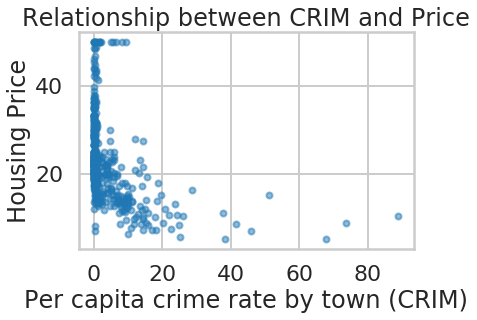

In [12]:
plt.scatter(bos.CRIM, bos.PRICE, marker='.', alpha=0.5)
plt.xlabel("Per capita crime rate by town (CRIM)")
plt.ylabel("Housing Price")
plt.title("Relationship between CRIM and Price")

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> What kind of relationship do you see? e.g. positive, negative?  linear? non-linear? Is there anything else strange or interesting about the data? What about outliers?</p>


<p><b>Exercise:</b> Create scatter plots between *RM* and *PRICE*, and *PTRATIO* and *PRICE*. Label your axes appropriately using human readable labels. Tell a story about what you see.</p>

<p><b>Exercise:</b> What are some other numeric variables of interest? Why do you think they are interesting? Plot scatterplots with these variables and *PRICE* (house price) and tell a story about what you see.</p>

</div>

# your turn: describe relationship


Based on the scatter plot, there appears to be a negative relationship between crime and housing price. As the crime per capita increases, the price of housing appears to drop exponentially. Because people do not want to live in high crime areas, the housing price is higher in low crime areas and lower in high crime areas. 

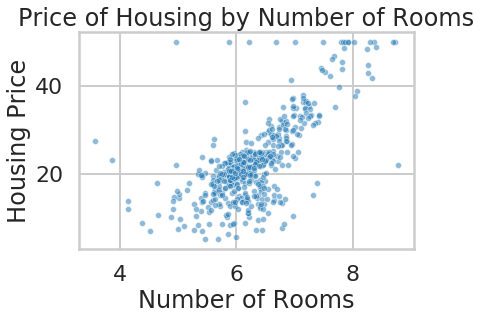

In [13]:
# your turn: scatter plot between *RM* and *PRICE*
_ = sns.scatterplot(x='RM', y='PRICE', data=bos, marker='.', alpha=0.5)
_ = plt.xlabel('Number of Rooms')
_ = plt.ylabel('Housing Price')
_ = plt.title('Price of Housing by Number of Rooms')

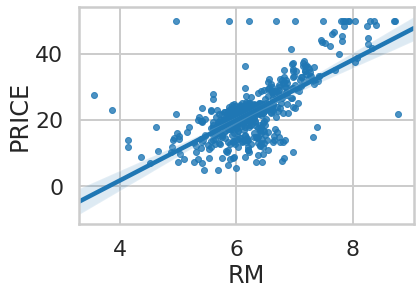

In [14]:
# use seaborn's regplot for a better visualization
_ = sns.regplot(x='RM', y='PRICE', data=bos, fit_reg=True, marker='.')

The scatter plot indicates a positive linear relationship between the price and number of rooms. Housing with more rooms tends to have a higher price, while housing with less rooms has a lower price. 

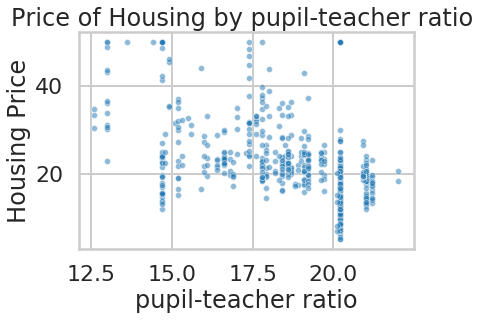

In [15]:
# your turn: scatter plot between *PTRATIO* and *PRICE*
_ = sns.scatterplot(x='PTRATIO', y='PRICE', data=bos,marker='.', alpha=0.5)
_ = plt.xlabel('pupil-teacher ratio')
_ = plt.ylabel('Housing Price')
_ = plt.title('Price of Housing by pupil-teacher ratio ')

The scatter plot of Housing Price vs pupil-teacher ratio indicates that lower pupil-teacher ratios occur in areas with higher price housing, while the lower price housing areas have higher pupil-teacher ratio. There is a negative relationship housing price and the pupil-teacher ratio.

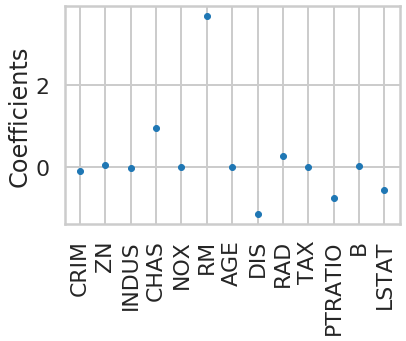

In [16]:
# Use Lasso regression to identify import ant features of the dataset
from sklearn.linear_model import Lasso

# separate targets and features
X = bos.drop('PRICE', axis=1).values
y = bos['PRICE'].values

# store feature names
names = bos.drop('PRICE', axis=1).columns

# instantiate the regressor
lasso = Lasso(alpha=0.1)

# fit the model to the data and extract coef attribute
lasso_coef = lasso.fit(X, y).coef_

# plot the coefficients
_ = plt.plot(range(len(names)), lasso_coef, marker='.', linestyle='none')
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients')


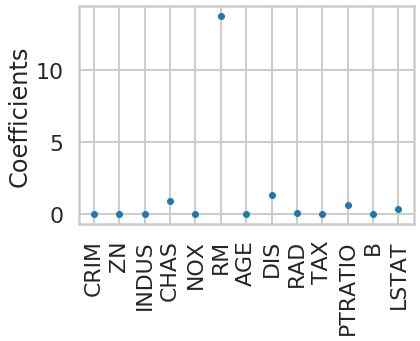

In [17]:
#square coefficeints for better comparison
lasso_coef_sq = lasso_coef**2

# plot the squared coefficients
_ = plt.plot(range(len(names)), lasso_coef_sq, marker='.', linestyle='none')
_ = plt.xticks(range(len(names)), names, rotation=90)
_ = plt.ylabel('Coefficients')


**Lasso Regression shows that RM, DIS, CHAS, PTRATIO, and LSTAT are the most important features for predicting PRICE.**

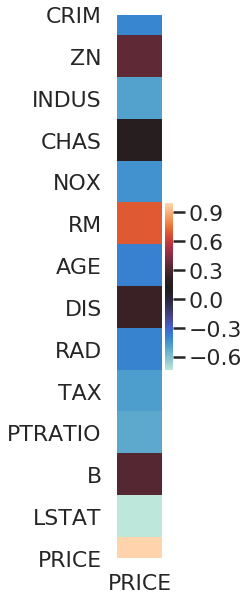

In [18]:
# create heat and ice map of variables correlated to price
corr = bos.corr()
_ = plt.figure(figsize=(1,10))
_ = sns.heatmap(corr[['PRICE']], cmap='icefire')


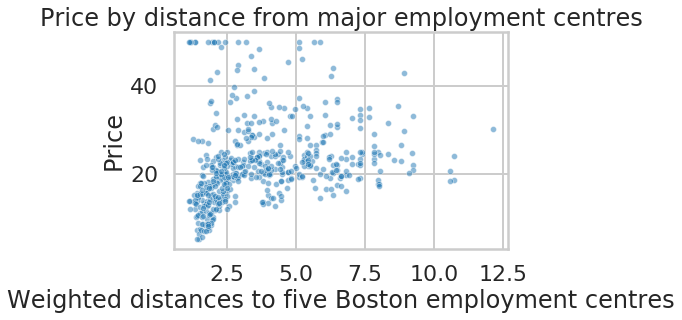

In [19]:
# your turn: create some other scatter plots
# scatter plot between economic status and price
_ = sns.scatterplot(x='DIS', y='PRICE', data=bos,marker='.', alpha=0.5)
_ = plt.xlabel('Weighted distances to five Boston employment centres')
_ = plt.ylabel('Price')
_ = plt.title('Price by distance from major employment centres')

The scatter plot shows that housing prices tend to be lower closer to major employment centers, with the exception of several highly priced boroughs close to major employment centers. 

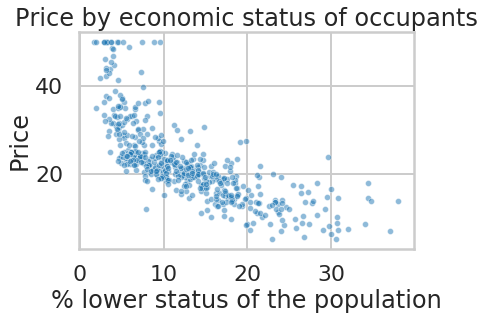

In [20]:

# scatter plot between economic status and price
_ = sns.scatterplot(x='LSTAT', y='PRICE', data=bos,marker='.', alpha=0.5)
_ = plt.xlabel('% lower status of the population')
_ = plt.ylabel('Price')
_ = plt.title('Price by economic status of occupants')

The scatter plot of price vs economic status indicates a negative relationship between price and areas with larger amounts of lower status occupants. This means that people with higher economic status tend to live in more expensive housing while occupants with lower economic status tend to live in areas where housing is less expensive. 

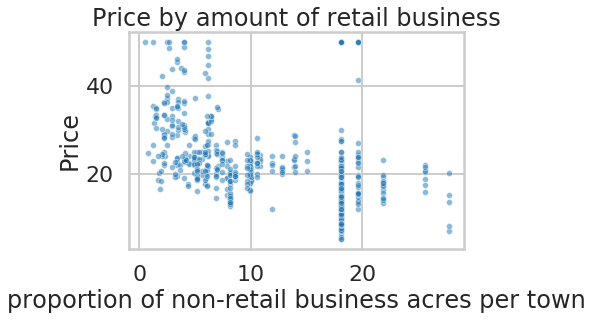

In [21]:
# scatter plot between economic status and price
_ = sns.scatterplot(x='INDUS', y='PRICE', data=bos,marker='.', alpha=0.5)
_ = plt.xlabel('proportion of non-retail business acres per town')
_ = plt.ylabel('Price')
_ = plt.title('Price by amount of retail business')

The scatter plot comparing retail-business to housing prices indicates that areas with more retail business have higher housing prices. 

### Scatterplots using Seaborn
***

[Seaborn](https://stanford.edu/~mwaskom/software/seaborn/) is a cool Python plotting library built on top of matplotlib. It provides convenient syntax and shortcuts for many common types of plots, along with better-looking defaults.

We can also use [seaborn regplot](https://stanford.edu/~mwaskom/software/seaborn/tutorial/regression.html#functions-to-draw-linear-regression-models) for the scatterplot above. This provides automatic linear regression fits (useful for data exploration later on). Here's one example below.

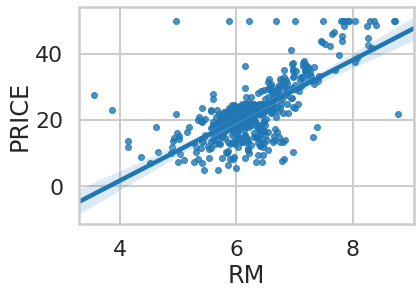

In [22]:
_ = sns.regplot(y="PRICE", x="RM", data=bos, fit_reg=True, marker='.')

### Histograms
***


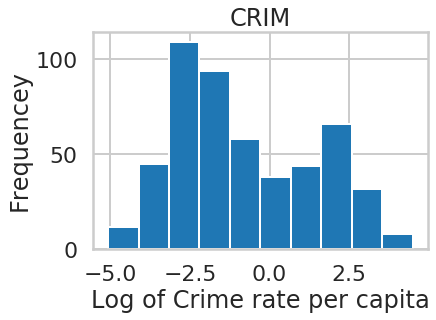

In [23]:
plt.hist(np.log(bos.CRIM))
plt.title("CRIM")
plt.xlabel("Log of Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

<div class="span5 alert alert-info">
<h3>Part 2 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> In the above histogram, we took the logarithm of the crime rate per capita. Repeat this histogram without taking the log. What was the purpose of taking the log? What do we gain by making this transformation? What do you now notice about this variable that is not obvious without making the transformation?

<p><b>Exercise:</b> Plot the histogram for *RM* and *PTRATIO* against each other, along with the two variables you picked in the previous section. We are looking for correlations in predictors here.</p>
</div>

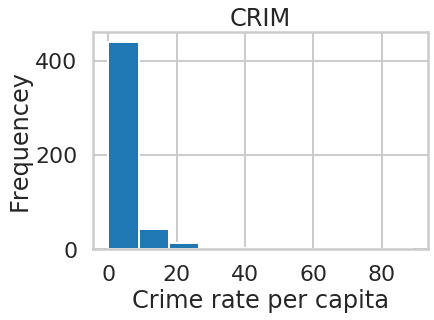

In [24]:
#your turn
_ = bos.CRIM.plot(kind='hist')
plt.title("CRIM")
plt.xlabel("Crime rate per capita")
plt.ylabel("Frequencey")
plt.show()

Taking the log of the data provides a better visualization of the distribution for the crime rate per capita. Plotting the log reveals the bimodal distribution in the data. 

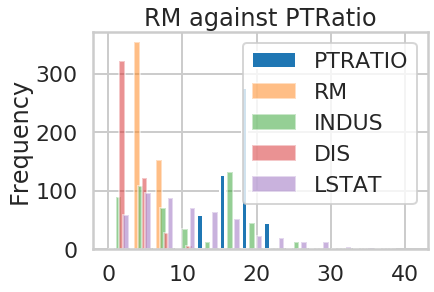

In [25]:
bins = np.arange(0,40,3)
width = .75
_ = plt.hist(bos.PTRATIO, alpha=1, bins=bins+0.0, width=width)
_ = plt.hist(bos.RM, alpha=0.5, bins=bins+0.5, width=width)
_ = plt.hist(bos.INDUS, alpha=0.5, bins=bins+1.0, width=width)
_ = plt.hist(bos.DIS, alpha=0.5, bins=bins+1.5, width=width)
_ = plt.hist(bos.LSTAT, alpha=0.5, bins=bins+2.0, width=width)

_ = plt.title('RM against PTRatio')
_ = plt.ylabel('Frequency')

_ = plt.legend(['PTRATIO', 'RM', 'INDUS', 'DIS', 'LSTAT'])

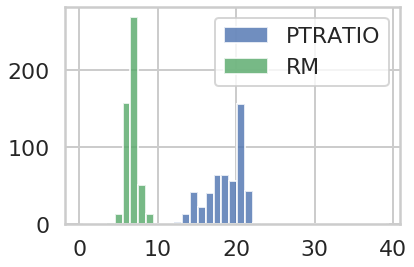

In [26]:
plt.style.use('seaborn-deep')
labels = ['PTRATIO', 'RM']
bins = np.arange(0,40,1)
w=1
_ = plt.hist([bos.PTRATIO, bos.RM],bins=bins, width=w, label=labels, alpha=0.8)
_ = plt.legend(loc='upper right')

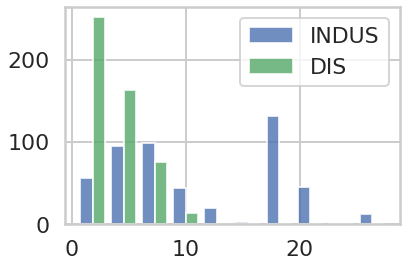

In [27]:
plt.style.use('seaborn-deep')
labels = ['INDUS', 'DIS']
_ = plt.hist([bos.INDUS, bos.DIS], label=labels, alpha=0.8)
_ = plt.legend(loc='upper right')

## Part 3: Linear Regression with Boston Housing Data Example
***

Here, 

$Y$ = boston housing prices (called "target" data in python, and referred to as the dependent variable or response variable)

and

$X$ = all the other features (or independent variables, predictors or explanatory variables)

which we will use to fit a linear regression model and predict Boston housing prices. We will use the least-squares method to estimate the coefficients.  

We'll use two ways of fitting a linear regression. We recommend the first but the second is also powerful in its features.

### Fitting Linear Regression using `statsmodels`
***
[Statsmodels](http://statsmodels.sourceforge.net/) is a great Python library for a lot of basic and inferential statistics. It also provides basic regression functions using an R-like syntax, so it's commonly used by statisticians. While we don't cover statsmodels officially in the Data Science Intensive workshop, it's a good library to have in your toolbox. Here's a quick example of what you could do with it. The version of least-squares we will use in statsmodels is called *ordinary least-squares (OLS)*. There are many other versions of least-squares such as [partial least squares (PLS)](https://en.wikipedia.org/wiki/Partial_least_squares_regression) and [weighted least squares (WLS)](https://en.wikipedia.org/wiki/Iteratively_reweighted_least_squares).

In [28]:
# Import regression modules
import statsmodels.api as sm
from statsmodels.formula.api import ols

In [29]:
# statsmodels works nicely with pandas dataframes
# The thing inside the "quotes" is called a formula, a bit on that below
m = ols('PRICE ~ RM',bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.484
Model:                            OLS   Adj. R-squared:                  0.483
Method:                 Least Squares   F-statistic:                     471.8
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           2.49e-74
Time:                        01:25:22   Log-Likelihood:                -1673.1
No. Observations:                 506   AIC:                             3350.
Df Residuals:                     504   BIC:                             3359.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept    -34.6706      2.650    -13.084      0.0

#### Interpreting coefficients

There is a ton of information in this output. But we'll concentrate on the coefficient table (middle table). We can interpret the `RM` coefficient (9.1021) by first noticing that the p-value (under `P>|t|`) is so small, basically zero. This means that the number of rooms, `RM`, is a statisticall significant predictor of `PRICE`. The regression coefficient for `RM` of 9.1021 means that *on average, each additional room is associated with an increase of $\$9,100$ in house price net of the other variables*. The confidence interval gives us a range of plausible values for this average change, about ($\$8,279, \$9,925$), definitely not chump change. 

In general, the $\hat{\beta_i}, i > 0$ can be interpreted as the following: "A one unit increase in $x_i$ is associated with, on average, a $\hat{\beta_i}$ increase/decrease in $y$ net of all other variables."

On the other hand, the interpretation for the intercept, $\hat{\beta}_0$ is the average of $y$ given that all of the independent variables $x_i$ are 0.

####  `statsmodels` formulas
***
This formula notation will seem familiar to `R` users, but will take some getting used to for people coming from other languages or are new to statistics.

The formula gives instruction for a general structure for a regression call. For `statsmodels` (`ols` or `logit`) calls you need to have a Pandas dataframe with column names that you will add to your formula. In the below example you need a pandas data frame that includes the columns named (`Outcome`, `X1`,`X2`, ...), but you don't need to build a new dataframe for every regression. Use the same dataframe with all these things in it. The structure is very simple:

`Outcome ~ X1`

But of course we want to to be able to handle more complex models, for example multiple regression is doone like this:

`Outcome ~ X1 + X2 + X3`

In general, a formula for an OLS multiple linear regression is

`Y ~ X1 + X2 + ... + Xp`

This is the very basic structure but it should be enough to get you through the homework. Things can get much more complex. You can force statsmodels to treat variables as categorical with the `C()` function, call numpy functions to transform data such as `np.log` for extremely-skewed data, or fit a model without an intercept by including `- 1` in the formula. For a quick run-down of further uses see the `statsmodels` [help page](http://statsmodels.sourceforge.net/devel/example_formulas.html).


Let's see how our model actually fit our data. We can see below that there is a ceiling effect, we should probably look into that. Also, for large values of $Y$ we get underpredictions, most predictions are below the 45-degree gridlines. 

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set I</h3>

<p><b>Exercise:</b> Create a scatterplot between the predicted prices, available in `m.fittedvalues` (where `m` is the fitted model) and the original prices. How does the plot look? Do you notice anything interesting or weird in the plot? Comment on what you see.</p>
</div>

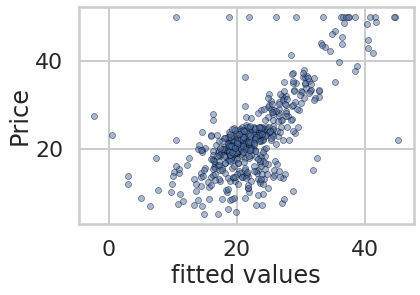

In [30]:
# your turn
_ = sns.scatterplot(m.fittedvalues, bos.PRICE, edgecolor='k',marker='.', alpha=0.5)
_ = plt.xlabel('fitted values')
_ = plt.ylabel('Price')

There is a positive linear relationship between the fitted values and the original prices. It is interesting that the fitted values and the actual price are not equal, meaning many of the scatter points are not on the line y=x. 

### Fitting Linear Regression using `sklearn`


In [31]:
from sklearn.linear_model import LinearRegression
X = bos.drop('PRICE', axis = 1)

# This creates a LinearRegression object
lm = LinearRegression()
lm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

#### What can you do with a LinearRegression object? 
***
Check out the scikit-learn [docs here](http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). We have listed the main functions here. Most machine learning models in scikit-learn follow this same API of fitting a model with `fit`, making predictions with `predict` and the appropriate scoring function `score` for each model.

Main functions | Description
--- | --- 
`lm.fit()` | Fit a linear model
`lm.predit()` | Predict Y using the linear model with estimated coefficients
`lm.score()` | Returns the coefficient of determination (R^2). *A measure of how well observed outcomes are replicated by the model, as the proportion of total variation of outcomes explained by the model*

#### What output can you get?

In [32]:
# Look inside lm object
# lm.<tab>

Output | Description
--- | --- 
`lm.coef_` | Estimated coefficients
`lm.intercept_` | Estimated intercept 

### Fit a linear model
***

The `lm.fit()` function estimates the coefficients the linear regression using least squares. 

In [33]:
# Use all 13 predictors to fit linear regression model
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set II</h3>

<p><b>Exercise:</b> How would you change the model to not fit an intercept term? Would you recommend not having an intercept? Why or why not? For more information on why to include or exclude an intercept, look [here](https://stats.idre.ucla.edu/other/mult-pkg/faq/general/faq-what-is-regression-through-the-origin/).</p>

<p><b>Exercise:</b> One of the assumptions of the linear model is that the residuals must be i.i.d. (independently and identically distributed). To satisfy this, is it enough that the residuals are normally distributed? Explain your answer.</p>

<p><b>Exercise:</b> True or false. To use linear regression, $Y$ must be normally distributed. Explain your answer.</p>
</div>


In [34]:
# your turn


The fitted model should not have an intercept term because a property with 0 rooms should cost $0. There is no logical scenario where a property owner would assign value to a property consisting of zero room and zero square-feet. 

By default, the Linear Model will fit an intercept. By setting the fit_intercept keyword argument to False, the model will not fit an intercept term. 

In [35]:
# define features
X = bos.drop('PRICE', axis = 1)

# create LinearRegression object
lm = LinearRegression(fit_intercept=False)

# fit model model to data
lm.fit(X, bos.PRICE)

LinearRegression(copy_X=True, fit_intercept=False, n_jobs=None, normalize=False)

In [36]:
lm.intercept_

0.0

Yes, it is enough to say that normally distributed residuals satisfy the condition of i.i.d.. Because the normal distribution is constructed of independent data with uniform variance, it is appropriate to clain the data are Independently and Identically Distributed.   

**FALSE** Only the residuals need to be normally distributed. This is one of the Assumptions of Linear Regression. 

### Estimated intercept and coefficients

Let's look at the estimated coefficients from the linear model using `1m.intercept_` and `lm.coef_`.  

After we have fit our linear regression model using the least squares method, we want to see what are the estimates of our coefficients $\beta_0$, $\beta_1$, ..., $\beta_{13}$: 

$$ \hat{\beta}_0, \hat{\beta}_1, \ldots, \hat{\beta}_{13} $$



In [37]:
print('Estimated intercept coefficient: {}'.format(lm.intercept_))

Estimated intercept coefficient: 0.0


In [38]:
print('Number of coefficients: {}'.format(len(lm.coef_)))

Number of coefficients: 13


In [39]:
# The coefficients
pd.DataFrame({'features': X.columns, 'estimatedCoefficients': lm.coef_})[['features', 'estimatedCoefficients']]

,features,estimatedCoefficients
0,CRIM,-0.092897
1,ZN,0.048715
2,INDUS,-0.004060
3,CHAS,2.853999
4,NOX,-2.868436
5,RM,5.928148
6,AGE,-0.007269
7,DIS,-0.968514
8,RAD,0.171151
9,TAX,-0.009396


### Predict Prices 

We can calculate the predicted prices ($\hat{Y}_i$) using `lm.predict`. 

$$ \hat{Y}_i = \hat{\beta}_0 + \hat{\beta}_1 X_1 + \ldots \hat{\beta}_{13} X_{13} $$

In [40]:
# first five predicted prices
lm.predict(X)[0:5]

array([29.09826353, 24.50227548, 31.22742641, 29.7071035 , 29.56479572])

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set III</h3>

<p><b>Exercise:</b> Histogram: Plot a histogram of all the predicted prices. Write a story about what you see. Describe the shape, center and spread of the distribution. Are there any outliers? What might be the reason for them? Should we do anything special with them?</p>

<p><b>Exercise:</b> Scatterplot: Let's plot the true prices compared to the predicted prices to see they disagree (we did this with `statsmodels` before).</p>

<p><b>Exercise:</b> We have looked at fitting a linear model in both `statsmodels` and `scikit-learn`. What are the advantages and disadvantages of each based on your exploration? Based on the information provided by both packages, what advantage does `statsmodels` provide?</p>
</div>

In [41]:
# your turn


outlier: -6.0063194120882315
mean:	 22.470510657084052
stdev:	 7.940841798939924


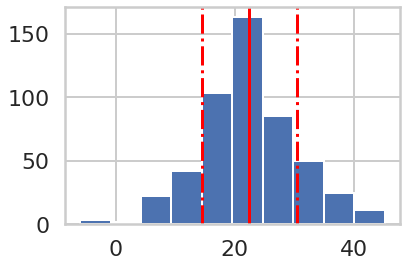

In [42]:
y_pred = lm.predict(X)
_ = plt.hist(y_pred)
_ = plt.axvline(np.mean(y_pred), color='r')
_ = plt.axvline(np.mean(y_pred)-np.std(y_pred), color='r', linestyle='-.')
_ = plt.axvline(np.mean(y_pred)+np.std(y_pred), color='r', linestyle='-.')
print('outlier:', min(y_pred))
print('mean:\t',np.mean(y_pred))
print('stdev:\t', np.std(y_pred))

In [43]:
idx_outlier = np.argmin(y_pred)
outlier = bos.loc[[idx_outlier]].head()
outlier['PREDICTED_PRICE'] = y_pred[idx_outlier]
outlier.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,PRICE,PREDICTED_PRICE
414,45.7461,0.0,18.1,0.0,0.693,4.519,100.0,1.6582,24.0,666.0,20.2,88.27,36.98,7.0,-6.006319


There is an outlier in the data. The model predicted a negative price from a given observation of features. This must be incorrect because it is not logical for a property to have a negative value. When compared to the known price, we can clearly see that the prices differ. 

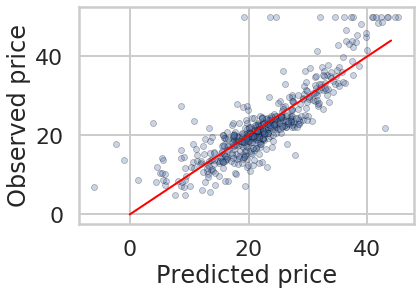

In [44]:
_ = sns.scatterplot(y_pred, bos.PRICE, edgecolor='k', alpha=0.3, marker='.')
_ = plt.plot(range(0,int(max(y_pred))), color='r', linewidth=2)
_ = plt.xlabel('Predicted price')
_ = plt.ylabel('Observed price')

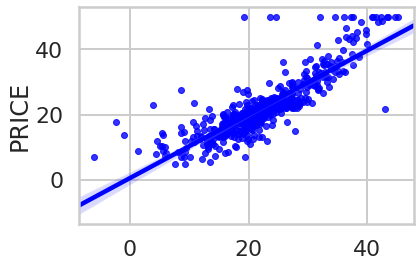

In [45]:
_ = sns.regplot(y_pred, bos.PRICE, color='blue', marker='.')

Statsmodels provides more 'under the hood' access to Regression models when compared to scikit-learn. Statsmodels provides more reports about the models characteristics and better access to attributes such as coefficients and various scores for comparing models. Sklearn excels in the case of simplicity and ease for the user. sklearn does not require and 'R like' formula to fit the models. Simply pass the features and targets to the regressor object to fit the model. 

### Evaluating the Model: Sum-of-Squares

The partitioning of the sum-of-squares shows the variance in the predictions explained by the model and the variance that is attributed to error.

$$TSS = ESS + RSS$$

#### Residual Sum-of-Squares (aka $RSS$)

The residual sum-of-squares is one of the basic ways of quantifying how much error exists in the fitted model. We will revisit this in a bit.

$$ RSS = \sum_{i=1}^N r_i^2 = \sum_{i=1}^N \left(y_i - \left(\beta_0 + \beta_1 x_i\right)\right)^2 $$

In [46]:
print(np.sum((bos.PRICE - lm.predict(X)) ** 2))

12228.046261044004


#### Explained Sum-of-Squares (aka $ESS$)

The explained sum-of-squares measures the variance explained by the regression model.

$$ESS = \sum_{i=1}^N \left( \hat{y}_i - \bar{y} \right)^2 = \sum_{i=1}^N \left( \left( \hat{\beta}_0 + \hat{\beta}_1 x_i \right) - \bar{y} \right)^2$$

In [47]:
print(np.sum((lm.predict(X) - np.mean(bos.PRICE)) ** 2))

31908.7897083164


### Evaluating the Model: The Coefficient of Determination ($R^2$)

The coefficient of determination, $R^2$, tells us the percentage of the variance in the response variable $Y$ that can be explained by the linear regression model.

$$ R^2 = \frac{ESS}{TSS} $$

The $R^2$ value is one of the most common metrics that people use in describing the quality of a model, but it is important to note that *$R^2$ increases artificially as a side-effect of increasing the number of independent variables.* While $R^2$ is reported in almost all statistical packages, another metric called the *adjusted $R^2$* is also provided as it takes into account the number of variables in the model, and can sometimes even be used for non-linear regression models!

$$R_{adj}^2 = 1 - \left( 1 - R^2 \right) \frac{N - 1}{N - K - 1} = R^2 - \left( 1 - R^2 \right) \frac{K}{N - K - 1} = 1 - \frac{\frac{RSS}{DF_R}}{\frac{TSS}{DF_T}}$$

where $N$ is the number of observations, $K$ is the number of variables, $DF_R = N - K - 1$ is the degrees of freedom associated with the residual error and $DF_T = N - 1$ is the degrees of the freedom of the total error.

### Evaluating the Model: Mean Squared Error and the $F$-Statistic
***
The mean squared errors are just the *averages* of the sum-of-squares errors over their respective degrees of freedom.

$$MSE = \frac{RSS}{N-K-1}$$

$$MSR = \frac{ESS}{K}$$

**Remember:** Notation may vary across resources particularly the use of $R$ and $E$ in $RSS/ESS$ and $MSR/MSE$. In some resources, E = explained and R = residual. In other resources, E = error and R = regression (explained). **This is a very important distinction that requires looking at the formula to determine which naming scheme is being used.**

Given the MSR and MSE, we can now determine whether or not the entire model we just fit is even statistically significant. We use an $F$-test for this. The null hypothesis is that all of the $\beta$ coefficients are zero, that is, none of them have any effect on $Y$. The alternative is that *at least one* $\beta$ coefficient is nonzero, but it doesn't tell us which one in a multiple regression:

$$H_0: \beta_i = 0, \mbox{for all $i$} \\
H_A: \beta_i > 0, \mbox{for some $i$}$$ 

$$F = \frac{MSR}{MSE} = \left( \frac{R^2}{1 - R^2} \right) \left( \frac{N - K - 1}{K} \right)$$
 
Once we compute the $F$-statistic, we can use the $F$-distribution with $N-K$ and $K-1$ degrees of degrees of freedom to get a p-value.

**Warning!** The $F$-statistic mentioned in this section is NOT the same as the F1-measure or F1-value discused in Unit 7.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set IV</h3>

<p>Let's look at the relationship between `PTRATIO` and housing price.</p>

<p><b>Exercise:</b> Try fitting a linear regression model using only the 'PTRATIO' (pupil-teacher ratio by town) and interpret the intercept and the coefficients.</p>

<p><b>Exercise:</b> Calculate (or extract) the $R^2$ value. What does it tell you?</p>

<p><b>Exercise:</b> Compute the $F$-statistic. What does it tell you?</p>

<p><b>Exercise:</b> Take a close look at the $F$-statistic and the $t$-statistic for the regression coefficient. What relationship do you notice? Note that this relationship only applies in *simple* linear regression models.</p>
</div>

In [48]:
# your turn


In [49]:
# Linear Regression with scikit-learn

from sklearn import linear_model
import sklearn.metrics as metrics

# extract desired columns
X = bos.PTRATIO.values.reshape(-1,1)
y= bos.PRICE.values.reshape(-1,1)

# instantiate the regressor
lm = linear_model.LinearRegression()

# fit the model to the data
lm.fit(X, y)


# compute F-statistic
# F=1 param contributes the same as a random vector
# F>>1 param has significant explanatory ability

# extract observations and features
N, _ = bos.shape
_, K = X.shape

# compute RSS (Residual Sum-of-Squares)
rss = np.sum((y - lm.predict(X))**2)

# compute ESS (Explained Sum-of-Squares)
ess = np.sum((lm.predict(X) - np.mean(y))**2)

# compute TSS
tss = ess + rss

# compute R-squared
r_squared = ess/tss
# same as: r_squared = lm.score(X, y)

# compute MSE (Mean Squared Error) 
mse = rss/(N - K - 1)
# same as: mse = metrics.mean_squared_error(y, lm.predict(X))

# compute MSR
msr = ess/K

# compute F-statistic
f_stat = msr/mse

coef = lm.coef_[0,0]
intercept = lm.intercept_[0]

reg_results_1feat = pd.DataFrame({'feat_1':{'N':N, 'K':K, 'RSS':rss, 'ESS':ess,'TSS':tss, 'R^2':r_squared, 'MSE':mse, 'MSR':msr, "F statistic":f_stat, 'Coef':coef, 'Intercept':intercept}})
reg_results_1feat

,feat_1
Coef,-2.157175
ESS,11014.282208
F statistic,175.105543
Intercept,62.344627
K,1.000000
MSE,62.900820
MSR,11014.282208
N,506.000000
RSS,31702.013207
R^2,0.257847


R-squared is used to measure the goodness-of-fit for a linear regression model. R-squared describes the strength of the relationship between the model and the dependent variable. It is a measure of how close the predicted values are to the fitted regression line in the figure below. The value of r^2 for the fitted model is 0.2578 or 25.78%

The F statistic is a measure of how well a feature contributes to the model's ability to make predictions. For values of F close to or equal to 1, the parameter contributes the same as a random vector. F values much larger than indicate a parameter's significant explanatory ability. 

In [50]:
# Linear Regression with statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('PRICE ~ PTRATIO', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.258
Model:                            OLS   Adj. R-squared:                  0.256
Method:                 Least Squares   F-statistic:                     175.1
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           1.61e-34
Time:                        01:25:25   Log-Likelihood:                -1764.8
No. Observations:                 506   AIC:                             3534.
Df Residuals:                     504   BIC:                             3542.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     62.3446      3.029     20.581      0.0

**In the case of simple linear regression, the F statistic is simply the square of the single parameter's t stastistic**

In [51]:
aic_1 = 3534.0

The t statistic of the coefficient is negative, describing the negative relationship between the pupil-teacher ratio and the price of housing. This means and increase in the pupil-teacher ratio will cause a decrease in the price of housing.

<div class="span5 alert alert-info">
<h3>Part 3 Checkup Exercise Set V</h3>

<p>Fit a linear regression model using three independent variables</p>

<ol>
<li> 'CRIM' (per capita crime rate by town)
<li> 'RM' (average number of rooms per dwelling)
<li> 'PTRATIO' (pupil-teacher ratio by town)
</ol>

<p><b>Exercise:</b> Compute or extract the $F$-statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Compute or extract the $R^2$ statistic. What does it tell you about the model?</p>

<p><b>Exercise:</b> Which variables in the model are significant in predicting house price? Write a story that interprets the coefficients.</p>
</div>

In [52]:
# your turn

In [53]:
# Linear Regression with scikit-learn

from sklearn import linear_model
import sklearn.metrics as metrics

# extract desired columns
X = bos[['CRIM', 'RM', 'PTRATIO']].values
y= bos.PRICE.values.reshape(-1,1)

# instantiate the regressor
lm = linear_model.LinearRegression()

# fit the model to the data
lm.fit(X, y)


# compute F-statistic
# F=1 param contributes the same as a random vector
# F>>1 param has significant explanatory ability

# extract observations and features
N, _ = bos.shape
_, K = X.shape

# compute RSS (Residual Sum-of-Squares)
rss = np.sum((y - lm.predict(X))**2)

# compute ESS (Explained Sum-of-Squares)
ess = np.sum((lm.predict(X) - np.mean(y))**2)

# compute TSS
tss = ess + rss

# compute R-squared
r_squared = ess/tss
# same as: r_squared = lm.score(X, y)

# compute MSE (Mean Squared Error) 
mse = rss/(N - K - 1)
# same as: mse = metrics.mean_squared_error(y, lm.predict(X))

# compute MSR
msr = ess/K

# compute F-statistic
f_stat = msr/mse


# extract coefficients
crim_coef = lm.coef_[0][0]
rm_coef = lm.coef_[0][1]
ptratio_coef = lm.coef_[0][2]

# extract intercept
intercept = lm.intercept_[0]



reg_results_3feat = pd.DataFrame({'feat_3':{'N':N, 'K':K, 'RSS':rss, 'ESS':ess,'TSS':tss, 'R^2':r_squared, 'MSE':mse, 'MSR':msr, "F statistic":f_stat, 'crim_coef': crim_coef , 'rm_coef':rm_coef, 'ptratio_coef': ptratio_coef, 'Intercept': intercept}})
reg_results_3feat




,feat_3
ESS,25388.058295
F statistic,245.164490
Intercept,-3.370704
K,3.000000
MSE,34.518401
MSR,8462.686098
N,506.000000
RSS,17328.237120
R^2,0.594341
TSS,42716.295415


With and F statistic of 245.2 that is much greater than 1, we can assert that out features effectively contribute to the model's ability to make predictions. The three parameters have significant explanatory ability when predicting price.

When fitting the model with the three sets of features instead of just one feature, the model performs much better. With three features, the R-squared value increased from ~26% to **59.4%**.

The most significant variable for predicting that price of a house is the Number of Rooms (RM). The positive coefficient for this explanatory variables is much higher than the rest. This means that an increase in the number of rooms corresponds almost directly to an increase in price. The other two explanatory variables, Crime and Pupil-Teacher-Ratio (CRIM and PTRATIO) are negative and also significantly smaller than the RM coefficient. This means than that a large decrease in the amout of crime or the pupil-teacher ratio should only increase the price of homes by little bit. 

In [54]:
# Linear Regression with statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('PRICE ~ RM + CRIM + PTRATIO', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           6.15e-98
Time:                        01:25:26   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.4

In [55]:
aic_3 = 3232

## Part 4: Comparing Models

During modeling, there will be times when we want to compare models to see which one is more predictive or fits the data better. There are many ways to compare models, but we will focus on two.

### The $F$-Statistic Revisited

The $F$-statistic can also be used to compare two *nested* models, that is, two models trained on the same dataset where one of the models contains a *subset* of the variables of the other model. The *full* model contains $K$ variables and the *reduced* model contains a subset of these $K$ variables. This allows us to add additional variables to a base model and then test if adding the variables helped the model fit.

$$F = \frac{\left( \frac{RSS_{reduced} - RSS_{full}}{DF_{reduced} - DF_{full}} \right)}{\left( \frac{RSS_{full}}{DF_{full}} \right)}$$

where $DF_x = N - K_x - 1$ where $K_x$ is the number of variables in model $x$.

### Akaike Information Criterion (AIC)

Another statistic for comparing two models is AIC, which is based on the likelihood function and takes into account the number of variables in the model.

$$AIC = 2 K - 2 \log_e{L}$$

where $L$ is the likelihood of the model. AIC is meaningless in the absolute sense, and is only meaningful when compared to AIC values from other models. Lower values of AIC indicate better fitting models.

`statsmodels` provides the AIC in its output.

<div class="span5 alert alert-info">
<h3>Part 4 Checkup Exercises</h3>

<p><b>Exercise:</b> Find another variable (or two) to add to the model we built in Part 3. Compute the $F$-test comparing the two models as well as the AIC. Which model is better?</p>
</div>

In [56]:
# Linear Regression with statsmodels

import statsmodels.api as sm
from statsmodels.formula.api import ols

m = ols('PRICE ~ RM + CRIM + PTRATIO + CHAS + LSTAT', bos).fit()
print(m.summary())

                            OLS Regression Results                            
Dep. Variable:                  PRICE   R-squared:                       0.690
Model:                            OLS   Adj. R-squared:                  0.687
Method:                 Least Squares   F-statistic:                     222.7
Date:                Thu, 02 Jan 2020   Prob (F-statistic):          1.11e-124
Time:                        01:25:27   Log-Likelihood:                -1543.9
No. Observations:                 506   AIC:                             3100.
Df Residuals:                     500   BIC:                             3125.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     16.5736      3.927      4.221      0.0

In [57]:
aic_5 = 3100.0

In [58]:
# Linear Regression with scikit-learn

from sklearn import linear_model
import sklearn.metrics as metrics

# extract desired columns
X = bos[['CRIM', 'RM', 'PTRATIO', 'CHAS', 'LSTAT']].values
y= bos.PRICE.values.reshape(-1,1)

# instantiate the regressor
lm = linear_model.LinearRegression()

# fit the model to the data
lm.fit(X, y)


# compute F-statistic
# F=1 param contributes the same as a random vector
# F>>1 param has significant explanatory ability

# extract observations and features
N, _ = bos.shape
_, K = X.shape

# compute RSS (Residual Sum-of-Squares)
rss = np.sum((y - lm.predict(X))**2)

# compute ESS (Explained Sum-of-Squares)
ess = np.sum((lm.predict(X) - np.mean(y))**2)

# compute TSS
tss = ess + rss

# compute R-squared
r_squared = ess/tss
# same as: r_squared = lm.score(X, y)

# compute MSE (Mean Squared Error) 
mse = rss/(N - K - 1)
# same as: mse = metrics.mean_squared_error(y, lm.predict(X))

# compute MSR
msr = ess/K

# compute F-statistic
f_stat = msr/mse

crim_coef = lm.coef_[0][0]
rm_coef = lm.coef_[0][1]
ptratio_coef = lm.coef_[0][2]
chas_coef = lm.coef_[0][3]
lstat_coef = lm.coef_[0][4]

intercept = lm.intercept_[0]

reg_results_5feat = pd.DataFrame({'feat_5':{'N':N, 'K':K, 'RSS':rss, 'ESS':ess,'TSS':tss, 'R^2':r_squared, 'MSE':mse, 'MSR':msr, "F statistic":f_stat, 'crim_coef': crim_coef , 'rm_coef':rm_coef, 'ptratio_coef': ptratio_coef, 'Intercept': intercept, 'chas_coef':chas_coef, 'lstat_coef':lstat_coef}})
reg_results_5feat


,feat_5
ESS,29477.804871
F statistic,222.667416
Intercept,16.573627
K,5.000000
MSE,26.476981
MSR,5895.560974
N,506.000000
RSS,13238.490544
R^2,0.690083
TSS,42716.295415


In [59]:
results = reg_results_5feat.join(reg_results_3feat).join(reg_results_1feat)
results

,feat_5,feat_3,feat_1
ESS,29477.804871,25388.058295,11014.282208
F statistic,222.667416,245.164490,175.105543
Intercept,16.573627,-3.370704,62.344627
K,5.000000,3.000000,1.000000
MSE,26.476981,34.518401,62.900820
MSR,5895.560974,8462.686098,11014.282208
N,506.000000,506.000000,506.000000
RSS,13238.490544,17328.237120,31702.013207
R^2,0.690083,0.594341,0.257847
TSS,42716.295415,42716.295415,42716.295415


In [60]:
def f_score(c_full, c_red, results):
    """Use F-Statistic to compare two nested models"""
    
    # extract RSS
    rss_red = results.loc['RSS', c_red]
    rss_full = results.loc['RSS', c_full]

    # extract Degress of Freedom
    df_red = results.loc['N', c_red] - results.loc['K', c_red]
    df_full = results.loc['N', c_full] - results.loc['K', c_full]
    
    # compute F
    f = ((rss_red - rss_full)/(df_red - df_full))/(rss_full / df_full)
    
    return f
    
    

In [61]:
f_5_3 = f_score('feat_5', 'feat_3', results)
f_5_1 = f_score('feat_5', 'feat_1', results)
f_3_1 = f_score('feat_3', 'feat_1', results)

f_scores = pd.DataFrame({'F':{'F_5_3':f_5_3, 'F_5_1':f_5_1, 'F_3_1':f_3_1}})
f_scores

,F
F_3_1,208.619299
F_5_1,174.684282
F_5_3,77.386581


In [62]:
aic_scores = pd.DataFrame({'AIC':{'5 Features':aic_5, '3 Features':aic_3, '1 Feature':aic_1}})
aic_scores

,AIC
1 Feature,3534.0
3 Features,3232.0
5 Features,3100.0


When comparing all three models (Models trained on 1 feature, 3 features, and 5 features), different statistics provide different methods of comparing and evaluating the performance of each. According to the f_score, the 3 feature model outperformed the 5 feature model with respect to the 1 feature model being treated as the subset. According the the R-squared value, the 5 feature model had the highest R^2 value of 69%. According to the F-statistic, the 3 feature model again scored the highest with a value of 245. The respective values for the 1 feature, 3 feature, and 5 feature AIC scores were as follows: 3534, 3232, 3100.


## Part 5: Evaluating the Model via Model Assumptions and Other Issues
***
Linear regression makes several assumptions. It is always best to check that these assumptions are valid after fitting a linear regression model.

<div class="span5 alert alert-danger">
<ul>
  <li>**Linearity**. The dependent variable $Y$ is a linear combination of the regression coefficients and the independent variables $X$. This can be verified with a scatterplot of each $X$ vs. $Y$ and plotting correlations among $X$. Nonlinearity can sometimes be resolved by [transforming](https://onlinecourses.science.psu.edu/stat501/node/318) one or more independent variables, the dependent variable, or both. In other cases, a [generalized linear model](https://en.wikipedia.org/wiki/Generalized_linear_model) or a [nonlinear model](https://en.wikipedia.org/wiki/Nonlinear_regression) may be warranted.</li>
  <li>**Constant standard deviation**. The SD of the dependent variable $Y$ should be constant for different values of X. We can check this by plotting each $X$ against $Y$ and verifying that there is no "funnel" shape showing data points fanning out as $X$ increases or decreases. Some techniques for dealing with non-constant variance include weighted least squares (WLS), [robust standard errors](https://en.wikipedia.org/wiki/Heteroscedasticity-consistent_standard_errors), or variance stabilizing transformations.
    </li>
  <li> **Normal distribution for errors**.  The $\epsilon$ term we discussed at the beginning are assumed to be normally distributed. This can be verified with a fitted values vs. residuals plot and verifying that there is no pattern, and with a quantile plot.
  $$ \epsilon_i \sim N(0, \sigma^2)$$
Sometimes the distributions of responses $Y$ may not be normally distributed at any given value of $X$.  e.g. skewed positively or negatively. </li>
<li> **Independent errors**.  The observations are assumed to be obtained independently.
    <ul>
        <li>e.g. Observations across time may be correlated
    </ul>
</li>
</ul>  

</div>

There are some other issues that are important investigate with linear regression models.

<div class="span5 alert alert-danger">
<ul>
  <li>**Correlated Predictors:** Care should be taken to make sure that the independent variables in a regression model are not too highly correlated. Correlated predictors typically do not majorly affect prediction, but do inflate standard errors of coefficients making interpretation unreliable. Common solutions are dropping the least important variables involved in the correlations, using regularlization, or, when many predictors are highly correlated, considering a dimension reduction technique such as principal component analysis (PCA).
  <li>**Influential Points:** Data points that have undue influence on the regression model. These points can be high leverage points or outliers. Such points are typically removed and the regression model rerun.
</ul>
</div>


<div class="span5 alert alert-info">
<h3>Part 5 Checkup Exercises</h3>

<p>Take the reduced model from Part 3 to answer the following exercises. Take a look at [this blog post](http://mpastell.com/2013/04/19/python_regression/) for more information on using statsmodels to construct these plots.</p>
    
<p><b>Exercise:</b> Construct a fitted values versus residuals plot. What does the plot tell you? Are there any violations of the model assumptions?</p>

<p><b>Exercise:</b> Construct a quantile plot of the residuals. What does the plot tell you?</p>

<p><b>Exercise:</b> What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?</p>

<p><b>Exercise:</b> Identify any outliers (if any) in your model and write a story describing what these outliers might represent.</p>

<p><b>Exercise:</b> Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.</p>

<p><b>Exercise:</b> Remove the outliers and high leverage points from your model and run the regression again. How do the results change?</p>
</div>

In [63]:
# Your turn.


In [64]:
import pandas as pd
import numpy as np
import statsmodels.formula.api as sm
import matplotlib.pyplot as plt

fitted_model = sm.ols(formula='PRICE ~ RM + CRIM + PTRATIO', data=bos).fit()
results = fitted_model.summary()
results

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  PRICE   R-squared:                       0.594
Model:                            OLS   Adj. R-squared:                  0.592
Method:                 Least Squares   F-statistic:                     245.2
Date:                Thu, 02 Jan 2020   Prob (F-statistic):           6.15e-98
Time:                        01:25:28   Log-Likelihood:                -1612.0
No. Observations:                 506   AIC:                             3232.
Df Residuals:                     502   BIC:                             3249.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept     -3.3707      4.034     -0.836      0.404     -11.296       4.555
RM             7.3804      0.402     18.382      0.000       6.592       8.169
CRIM          -0.2050      0.032     -6.399      0.000      -0.268      -0.142
PTRATIO       -1.0695      0.133     -8.051      0.000      -1.331      -0.809
==============================================================================
Omnibus:                      234.656   Durbin-Watson:                   0.830
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2020.689
Skew:                           1.815   Prob(JB):                         0.00
Kurtosis:                      12.092   Cond. No.                         311.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
# data
y = bos['PRICE']
X = bos[['RM', 'CRIM', 'PTRATIO']]

Exercise:

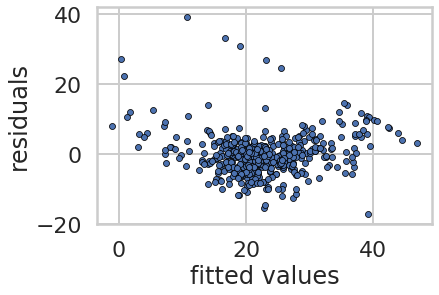

In [66]:
# Construct a fitted values versus residuals plot. 
# What does the plot tell you? 
# Are there any violations of the model assumptions?

fit_vals = fitted_model.fittedvalues
resids = fitted_model.resid

# create scatter plot
_ = sns.scatterplot(fit_vals, resids, marker='.', edgecolor='k')
_ = plt.ylabel('residuals')
_ = plt.xlabel('fitted values')

The residuals are not level and exhibit a flared/bowtie shape. This means a higher order expression should be used to fit the model, perhaps something quadratic. Furthermore, let's examine this distribution of the residuals to inspect for Normality, or the lack there of. 

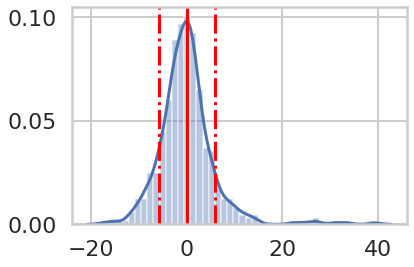

In [67]:
_ = sns.distplot(resids)
_ = plt.axvline(np.mean(resids), color='r')
_ = plt.axvline(np.mean(resids) - np.std(resids), color='r', linestyle='-.')
_ = plt.axvline(np.mean(resids) + np.std(resids), color='r', linestyle='-.')

Exercise:

In [68]:
# Construct a quantile plot of the residuals. 
# What does the plot tell you?

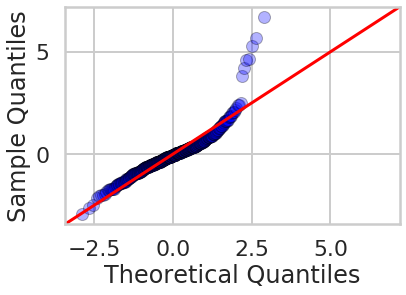

In [69]:
import statsmodels.api as sm
_ = sm.qqplot(fitted_model.resid, fit=True, markeredgecolor='k', alpha=0.3, line='45')
plt.show()

# fix this so the points are on the line y=x
# acheived by setting fit keyword arg to True

The quantile plot is a graphical technique for determining if two data sets come from populations with a common distribution. The two samples have a similar distribution if all of the points lie close to the line y=x. 

Exercise: What are some advantages and disadvantages of the fitted vs. residual and quantile plot compared to each other?

Exercise: Identify any outliers (if any) in your model and write a story describing what these outliers might represent.

Exercise: Construct a leverage plot and identify high leverage points in the model. Write a story explaining possible reasons for the high leverage points.

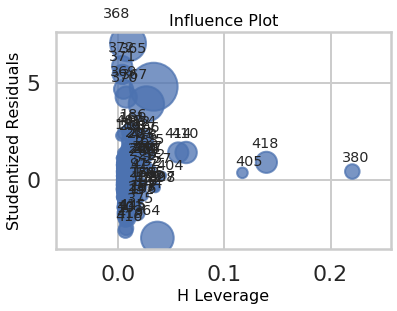

In [70]:
import statsmodels as sm
_ = sm.graphics.regressionplots.influence_plot(fitted_model)

Leverage plots are effective for showing which points might be exerting influence on the hypothesis test for X, spotting unusual patterns and violations on the model assumptions, and spotting multicollinearity issues. 

Exercise: Remove the outliers and high leverage points from your model and run the regression again. How do the results change?

In [71]:
def get_outlier_idx(model, num_out):
    idxs = []
    outliers = model.outlier_test(order=True)
    for i in range(num_out):
        idx = int(outliers.iloc[0].name)
        idxs.append(idx)
        outliers = outliers.drop(idx)
    return idxs
    

In [72]:
X.shape, y.shape

((506, 3), (506,))

In [73]:
bos_dropped = bos.copy()
for idx in get_outlier_idx(fitted_model, 20):
    #X = X.drop(idx)
    #y = y.drop(idx)
    bos_dropped = bos_dropped.drop(idx)
X.shape, y.shape

((506, 3), (506,))

In [74]:
bos.shape, bos_dropped.shape

((506, 14), (486, 14))

In [75]:
import statsmodels.formula.api as sm
new_model = sm.ols(formula='PRICE ~ RM + CRIM + PTRATIO', data=bos_dropped).fit()
new_results = new_model.summary()
results, new_results

(<class 'statsmodels.iolib.summary.Summary'>
 """
                             OLS Regression Results                            
 Dep. Variable:                  PRICE   R-squared:                       0.594
 Model:                            OLS   Adj. R-squared:                  0.592
 Method:                 Least Squares   F-statistic:                     245.2
 Date:                Thu, 02 Jan 2020   Prob (F-statistic):           6.15e-98
 Time:                        01:25:28   Log-Likelihood:                -1612.0
 No. Observations:                 506   AIC:                             3232.
 Df Residuals:                     502   BIC:                             3249.
 Df Model:                           3                                         
 Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
 ---------------------------------------------------------------------

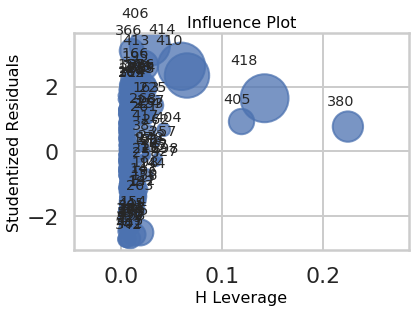

In [76]:
import statsmodels as sm
_ = sm.graphics.regressionplots.influence_plot(new_model)